# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [2]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all institution full names with their shorthand.
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
2243 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 51.79999999999998
Submissions to be graded: 2243
Submissions graded.


### Dataset

In [410]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [411]:
# Filter by institution
specific_institutions = ['UiS'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
#df = df[(df['Institution'].isin(specific_institutions))]

In [412]:
# Filter out all non INF100 related study programs
inf100_studyprograms = ['Nanoteknologi, Bachelor', 'Datateknologi, Bachelor', 'Datasikkerhet, Bachelor', 'Bioinformatikk, Bachelor', 'Informatikk, Matematikk og Økonomi, Bachelor', 'Fysikk, Bachelor', 'Data science, Siv.ing.', 'Kognitiv vitenskap, Bachelor', 'Energi, Siv.ing.', 'Geofysikk, Bachelor', 'Anvendt matematikk, Bachelor', 'Geovitenskap, Bachelor', 'Kjemi, Bachelor', 'Matematikk, Bachelor', 'Statistikk og data science, Bachelor', 'Vær hav og klimafysikk, Bachelor', 'Havteknologi, Siv.ing.', 'Integrert masterprogram i aktuarfag og analyse', 'Informatikk, Årsstudium', 'Biologi, Bachelor', 'Geofag og informatikk, Bachelor', 'Molykelærbiologi, Bachelor', 'Havbruk, Siv.ing.', 'Medisinsk teknologi, Siv.ing.']
#df = df[(df['Studyprogram'].isin(inf100_studyprograms))]

In [413]:
# Filter out all non informatics students at UiB
informatics_studyprograms = ['Datateknologi, Bachelor', 'Datasikkerhet, Bachelor', 'Bioinformatikk, Bachelor', 'Informatikk, Matematikk og Økonomi, Bachelor', 'Data science, Siv.ing.', 'Informatikk, Årsstudium']
#df = df[(df['Studyprogram'].isin(informatics_studyprograms))]

In [414]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024']
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [415]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [416]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 1971 student submissions.



### Institutions

Institution
NTNU    917
UiS     333
UiB     332
UiO     214
HiOf     95
HVL      75
NMBU      2
Name: count, dtype: int64


<Axes: ylabel='count'>

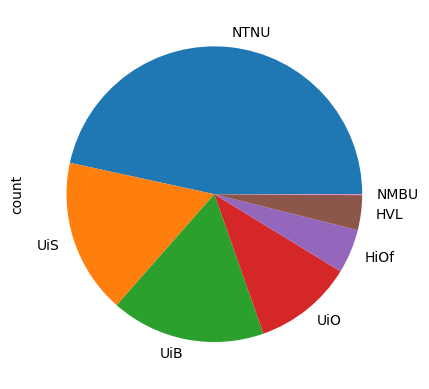

In [417]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Study Program

Studyprogram
Informatikk, bachelor                    38
Informasjonssystemer, bachelor           25
Ingeniørfag - data, bachelor             10
Årsstudiet i informasjonsteknologi        8
Ingeniørfag - data, Tress, bachelor       7
Ingeniørfag - data, Y-veien, bachelor     6
Name: count, dtype: int64


<Axes: ylabel='count'>

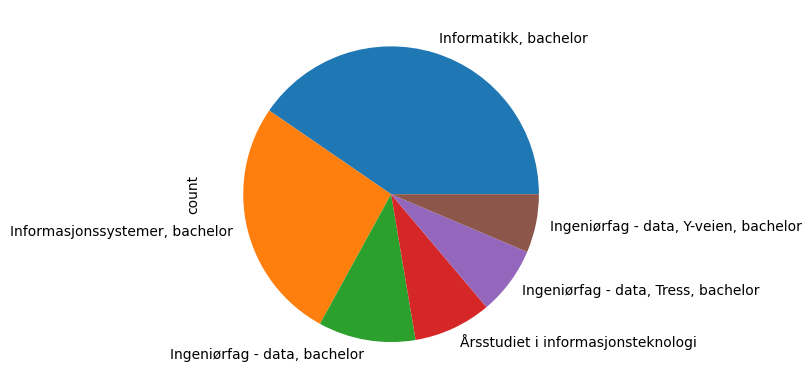

In [418]:
studyprogram = df.Studyprogram.unique()

studyprogram_column = "Studyprogram"
print(df[studyprogram_column].value_counts())
df[studyprogram_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2024     483
2023     419
2022     387
2021     142
2019      89
2020      85
2018      39
2017      33
2015      24
2014      23
2016      15
2012      11
2005      11
Annet     10
2010       6
2011       5
2007       4
2008       3
2009       3
2006       3
Name: count, dtype: int64


<Axes: ylabel='count'>

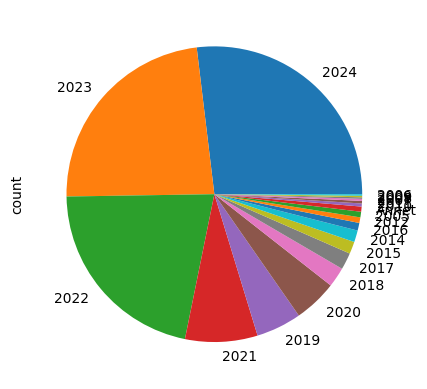

In [419]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    1171
f     661
      139
Name: count, dtype: int64
Gender
m    0.594115
f    0.335363
     0.070523
Name: proportion, dtype: float64


<Axes: ylabel='count'>

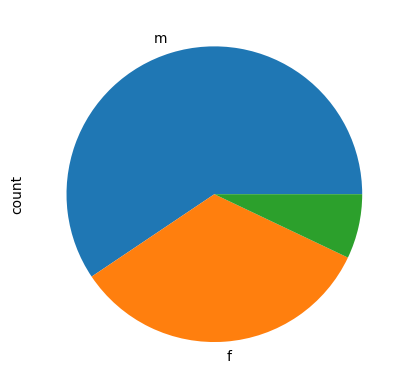

In [420]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [421]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

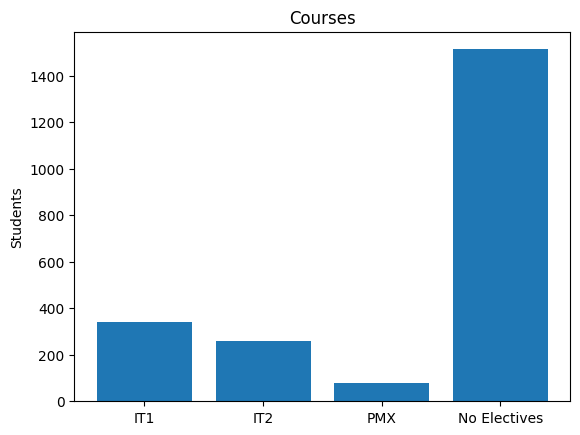

In [422]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

[287, 230, 1109, 200, 199, 1201, 1271]


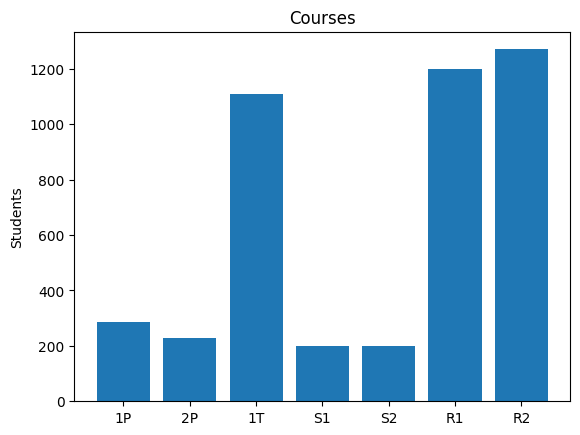

In [423]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

print(counts)
ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    1527
Ja      437
Name: count, dtype: int64
OutsideExperience
Nei    0.777495
Ja     0.222505
Name: proportion, dtype: float64


<Axes: ylabel='count'>

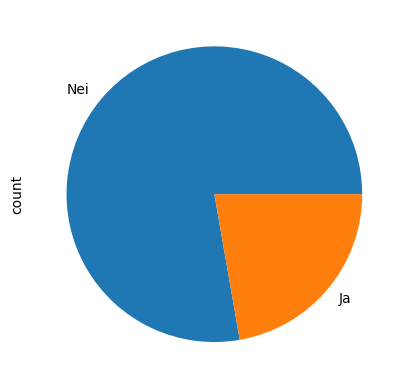

In [424]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [425]:
# Configurations
bins = 52
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 51.8.

Mean: 23.074
Standard deviation: 16.457


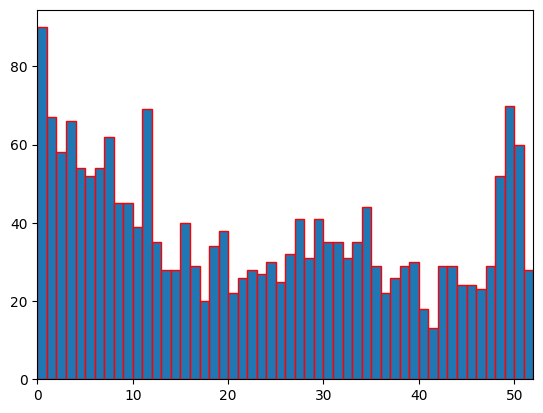

In [426]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')

plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, 52])
plt.margins(x=0.0001)
fig = plt.gcf()
plt.show()
fig.savefig('plots/allHist.png')

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

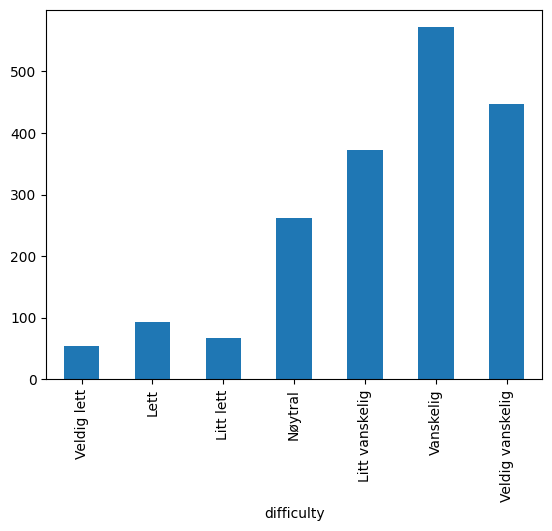

In [427]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [428]:
def compare_distributions(x, y, x_label, y_label):
    n = len(x)
    mean = x.mean()
    sd = x.std()
    print(f'N students in {x_label}: {n}')
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()

    n = len(y)
    mean = y.mean()
    sd = y.std()
    print(f'N students in {y_label}: {n}')
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, 52])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, 52])
    #plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, range=[0, 52])
    #plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, range=[0, 52])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.margins(x=0.0001)
    plt.legend(loc='upper right')
    fig = plt.gcf()
    plt.show()
    fig.savefig('plots/graduateYear.png')

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

N students in 2023 and 2024: 902
Mean of 2023 and 2024: 29.09
Standard deviation of 2023 and 2024: 15.413

N students in before 2023: 1069
Mean of before 2023: 17.999
Standard deviation of before 2023: 15.583


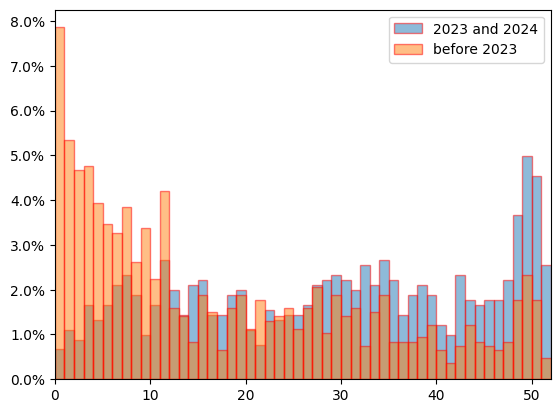

In [429]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

In [430]:
group1 = df[(years.isin(['2023', '2024']))]['Total']
group2 = df[(~years.isin(['2023', '2024']))]['Total']


# Perform Mann-Whitney U Test
stat, p_value = stats.ranksums(group1, group2)

# Print the test statistic and p-value
print(f"Wilcox Rank-sum test: {stat}")
print(f"P-value: {p_value}")

# Interpretation of p-value
a = 0.05
if p_value < a:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Wilcox Rank-sum test: 15.400563618104654
P-value: 1.622489797556795e-53
Reject the null hypothesis: There is a significant difference between the two groups.


### Mathematics Courses

N students in 2P: 230
Mean of 2P: 15.363
Standard deviation of 2P: 14.333

N students in R2: 1271
Mean of R2: 26.363
Standard deviation of R2: 16.526


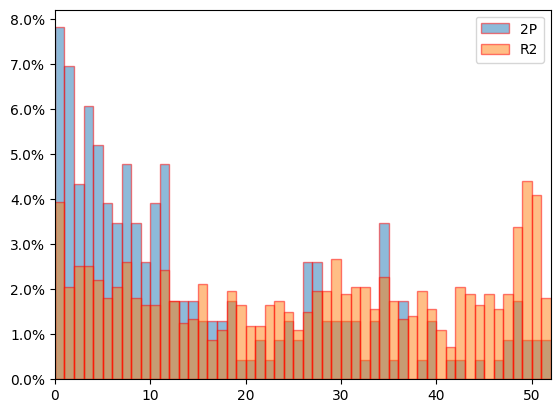

In [431]:
x = df[(df['2P'].isin(['2P']))]['Total']
y = df[(df['R2'].isin(['R2']))]['Total']
y = y[~np.isnan(y)]

x_label = '2P'
y_label = 'R2'

compare_distributions(x, y, x_label, y_label)

In [432]:
group1 = df[(df['2P'].isin(['2P']))]['Total']
group2 = df[(df['R2'].isin(['R2']))]['Total']


# Perform Mann-Whitney U Test
stat, p_value = stats.ranksums(group1, group2)

# Print the test statistic and p-value
print(f"Wilcox Rank-sum test: {stat}")
print(f"P-value: {p_value}")

# Interpretation of p-value
a = 0.05
if p_value < a:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Wilcox Rank-sum test: -9.247450516467438
P-value: 2.299109585396125e-20
Reject the null hypothesis: There is a significant difference between the two groups.


### Programming Electives

N students in IT2: 258
Mean of IT2: 37.912
Standard deviation of IT2: 14.167

N students in NoElective: 1514
Mean of NoElective: 19.56
Standard deviation of NoElective: 15.077


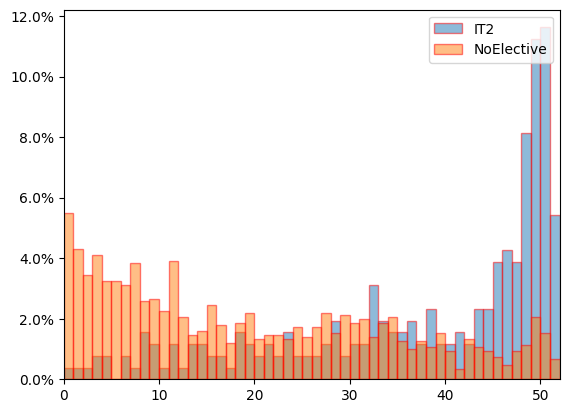

In [433]:
x = df[(df['IT2'].isin(['Informasjonsteknologi 2 (IT2)']))]['Total']
y = df[(df['NoElective'].isin([True]))]['Total']
y = y[~np.isnan(y)]

x_label = 'IT2'
y_label = 'NoElective'

compare_distributions(x, y, x_label, y_label)

In [434]:
group1 = df[(df['IT2'].isin(['Informasjonsteknologi 2 (IT2)']))]['Total']
group2 = df[(df['NoElective'].isin([True]))]['Total']


# Perform Mann-Whitney U Test
stat, p_value = stats.ranksums(group1, group2)

# Print the test statistic and p-value
print(f"Wilcox Rank-sum test: {stat}")
print(f"P-value: {p_value}")

# Interpretation of p-value
a = 0.05
if p_value < a:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Wilcox Rank-sum test: 15.830860641840246
P-value: 1.9059625563759802e-56
Reject the null hypothesis: There is a significant difference between the two groups.


### Outside Experience

N students in Outside experience: 437
Mean of Outside experience: 37.155
Standard deviation of Outside experience: 14.051

N students in No outside experience: 1527
Mean of No outside experience: 19.038
Standard deviation of No outside experience: 14.792


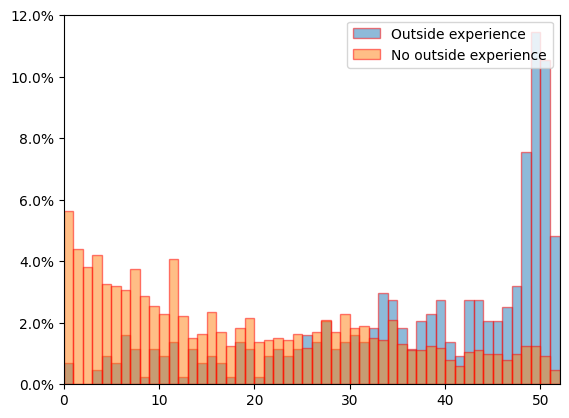

In [435]:
x = df[(df['OutsideExperience'].isin(['Ja']))]['Total']
y = df[(df['OutsideExperience'].isin(['Nei']))]['Total']
y = y[~np.isnan(y)]

x_label = 'Outside experience'
y_label = 'No outside experience'

compare_distributions(x, y, x_label, y_label)

In [436]:
group1 = df[(df['OutsideExperience'].isin(['Ja']))]['Total']
group2 = df[(df['OutsideExperience'].isin(['Nei']))]['Total']


# Perform Mann-Whitney U Test
stat, p_value = stats.ranksums(group1, group2)

# Print the test statistic and p-value
print(f"Wilcox Ra: {stat}")
print(f"P-value: {p_value}")

# Interpretation of p-value
a = 0.05
if p_value < a:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Wilcox Ra: 19.731826150638188
P-value: 1.14942293731912e-86
Reject the null hypothesis: There is a significant difference between the two groups.


### How many students do not need introductory programming?
The students who perform very well on this test might not need CS1. If we set an (arbitrary) point threshold we can get an indication of how many students can perhaps move on to more advanced courses.

In [437]:
threshold = 48
x = df[df['Total'] > threshold]
n = len(x)
percentage = round((n/len(df))*100, 2)

print(f'Number of students with a score over {threshold}: {n} ({percentage}%)')

Number of students with a score over 48: 210 (10.65%)


### Gender

N students in women: 661
Mean of women: 17.027
Standard deviation of women: 14.76

N students in men: 1171
Mean of men: 26.332
Standard deviation of men: 16.452


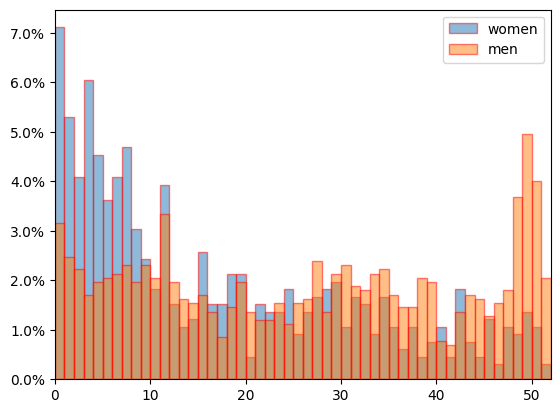

In [438]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [439]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [440]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)",	"100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       54.38 %
Booleans        62.49 %
Variables       52.99 %
Conditionals    57.51 %
Loops           29.62 %
Lists           33.73 %
Functions       22.00 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [441]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [442]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
1    1005
0     966
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             1005
Jeg vet ikke     652
str              124
float             99
list              47
bool              34
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
1    1009
0     962
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           1009
Jeg vet ikke     659
int              133
str              101
bool              43
list              11
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
0    1081
1     890
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
str             890
Jeg vet ikke    795
int              87
float            82
bool             74
list             21
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    1383
0     588
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list            138

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [443]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    1619
0     352
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            1619
I don't know     223
12.0              23
6.0               12
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [444]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    1358
0     613
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           1358
I don't know     320
13.0              14
12.23              6
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [445]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    1336
1     635
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        635
I don't know    471
246.0           177
123.0            12
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [446]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    1253
0     718
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             1253
I don't know     391
1.0              102
3.0               42
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [447]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    1360
1     611
Name: count, dtype: int64

Top 4 most common answers:
Operators5
I don't know    709
bca             598
abc              18
'bca'            16
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [448]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
1    1164
0     807
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0      1164
10.0       112
30.0         4
1.0          4
15.0         2
1020.0       2
0.5          1
10.2         1
220.0        1
80.0         1
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
1    1169
0     802
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            1169
I don't know     679
10.0              92
2.0                3
15.0               2
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [449]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
1    1108
0     863
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0    1108
20.0     108
2.0        3
40.0       1
30.0       1
0.5        1
0.0        1
1.0        1
80.0       1
15.0       1
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
1    1079
0     892
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            1079
I don't know     729
20.0             132
30.0               3
1.0                3
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [450]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
1    1082
0     889
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0    1082
10.0      96
30.0       5
29.0       1
1.0        1
0.5        1
0.0        1
15.0       1
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
0    1021
1     950
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
20.0            950
I don't know    770
10.0            218
30.0              3
2.0               1
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [451]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
0    1006
1     965
Name: count, dtype: int64

Top 5 most common answers:
Variables4a
 10.0    965
 20.0    176
 40.0      3
 30.0      3
 1.0       2
 10.2      1
-10.0      1
Name: count, dtype: int64
Number of correct responses:
Variables4b_points
1    1022
0     949
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            1022
I don't know     793
20.0             119
30.0               4
2.0                2
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [452]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
1    1067
0     904
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0    1067
30.0      60
10.0      54
1.0        3
0.0        1
29.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
1    1111
0     860
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
 30.0    1111
 20.0      37
 10.0      26
 2.0        2
 15.0       2
 3.0        1
-10.0       1
 1.0        1
 60.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
1    1104
0     867
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            1104
I don't know     763
20.0              29
10.0              28
60.0               2
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [453]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
1    1062
0     909
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    1062
20.0      42
10.0      31
60.0       2
0.0        2
6.0        1
5.0        1
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
0    1095
1     876
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
 30.0    876
 10.0    218
 20.0     38
 0.0       2
-20.0      1
 40.0      1
 60.0      1
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
0    1108
1     863
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
30.0            863
I don't know    791
20.0            188
10.0             79
60.0              3
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [454]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
True            1578
Jeg vet ikke     312
False             42
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
False           1732
Jeg vet ikke     144
True              59
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
True            1454
Jeg vet ikke     244
False            233
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
False           1699
Jeg vet ikke     161
True              66
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
True            1667
Jeg vet ikke     177
False             89
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
False           1552
Jeg vet ikke     332
True              48
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [455]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
False           1068
Jeg vet ikke     786
True              71
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False           1463
Jeg vet ikke     401
True              60
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True            1028
Jeg vet ikke     522
False            371
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True            1453
Jeg vet ikke     409
False             53
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
True            1183
Jeg vet ikke     518
False            217
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
Jeg vet ikke    1056
True             769
False            101
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [456]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
Jeg vet ikke    972
False           860
True             86
Name: count, dtype: int64

Top 3 most common answers:
True and False
Jeg vet ikke    973
False           814
True            125
Name: count, dtype: int64

Top 3 most common answers:
True or False
Jeg vet ikke    927
True            891
False            90
Name: count, dtype: int64

Top 3 most common answers:
True and True
True            982
Jeg vet ikke    834
False            98
Name: count, dtype: int64

Top 3 most common answers:
True or True
Jeg vet ikke    875
True            795
False           240
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    1132
True             631
False            149
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [457]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
True            1572
Jeg vet ikke     230
False            119
Name: count, dtype: int64

Top 3 most common answers:
100 == n
False           1459
Jeg vet ikke     428
True              35
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
False           1458
Jeg vet ikke     332
True             125
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
True            1138
Jeg vet ikke     425
False            349
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
True            1382
Jeg vet ikke     394
False            146
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
False           931
Jeg vet ikke    780
True            206
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [458]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    1343
0     628
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       1343
Jeg vet ikke     343
1                259
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [459]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
0    989
1    982
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               982
Jeg vet ikke    727
1               131
1 og 2           63
Ingenting        40
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [460]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    1109
0     862
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               1109
Jeg vet ikke     517
2 og 3           114
3                 60
1 og 2            50
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [461]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    1100
0     871
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          1100
Jeg vet ikke     521
1                131
1, 2 og 3         51
2                 44
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [462]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    1305
1     666
Name: count, dtype: int64

Top 5 most common answers:
Loops1
10.0            666
I don't know    561
1.0             248
9.0             207
123456789.0     111
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [463]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    1346
1     625
Name: count, dtype: int64

Top 5 most common answers:
Loops2
10.0            625
I don't know    580
2.0             245
8.0             185
2468.0          107
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [464]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
0    1037
1     934
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100             934
I don't know    755
0                71
102              54
2                 8
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [465]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    1425
1     546
Name: count, dtype: int64

Top 5 most common answers:
Loops4
I don't know    745
4.0             546
1.0             167
3.0             161
0.0              91
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [466]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    1463
1     508
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    1258
5.0              508
0.0               36
113.0             21
3.0               20
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [467]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    1533
1     438
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    1289
9.0              438
0.0               49
-5.0              18
-14.0             13
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [468]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    1392
1     579
Name: count, dtype: int64

Top 5 most common answers:
Lists1
I don't know    831
20.0            579
10.0            439
102030.0         37
60.0             10
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [469]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    1399
1     572
Name: count, dtype: int64

Top 5 most common answers:
Lists2
I don't know    880
25.0            572
15.0            390
152535.0         17
65.0             10
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [470]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
1    988
0    983
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    988
Jeg vet ikke    762
[15, 35, 55]     50
[5, 15, 25]      23
[10, 35, 30]     10
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    1451
1     520
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    959
[5, 35, 25]     520
[15, 35, 55]    252
[5, 15, 25]     101
[10, 35, 30]     25
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [471]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
0    1093
1     878
Name: count, dtype: int64

Top 5 most common answers:
Functions1
I don't know    976
15.0            878
5.1              23
510.0            13
10.0              2
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [472]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    1380
1     591
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    1201
1.0              591
2.0               55
100.0             38
0.0                2
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [473]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    1669
1     302
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    1177
1.0              302
12.0             172
1.2               91
2.0               64
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [474]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    1560
1     411
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    1384
5.0              411
6.0               37
0.0                9
2.0                2
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [475]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    1510
1     461
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    1050
10.0             461
6.0              160
9.0               78
5.0               58
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [476]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    1632
1     339
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know    1454
abcxyz           333
abc                9
abcxabcyabcz       8
Abcxyz             6
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [477]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    1570
1     401
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    1367
c                390
b                 44
C                 11
2                  9
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [478]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    1538
1     433
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    1328
25.0             433
15.0              66
152535.0           7
65.0               6
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [479]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    1884
1      87
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    1459
80.0             144
90.0              87
21.0              22
60.0              20
Name: count, dtype: int64


# Programming Concept Dependence
Many of the tasks utilize concepts tested in earlier tasks. To better understand how well 

In [480]:
import networkx as nx
import matplotlib.pyplot as plt

In [481]:
# Define the tasks and the which other task they depend on
tasks = {        
    'Conditionals1': {'2 > 7'},
    'Conditionals2': {'100 != 100'},
    'Conditionals3': {'(10*2) < 9', '100 == 100'},
    'Conditionals4': {'(1 + 3) < (2*3)', '100 == 100'},
    
    'Loops1': {'Operators4', 'n < 10'},
    'Loops2': {'Operators4', 'n < 10'},
    'Loops3': {'Operators4', 'n < 10'},
    'Loops4': {'Operators4', '(n < 7) and (4 > n)'},
    'Loops5': {},
    'Loops6': {'Conditionals1', 'Loops5'},
    'Loops7': {'Operators5', 'Loops5'},

    'Lists1': {},
    'Lists2': {'Lists1'},
    'Lists3a': {'Lists2'},
    'Lists3b': {'Lists2'},
    
    'Functions1': {'Operators1'},
    'Functions2': {'Conditionals1', '100 == 100'},
    'Functions3': {'Conditionals4'},
    'Functions4': {'Operators4', '(10*2) < 9', 'Conditionals1'},
    'Functions5': {'Loops1'},
    'Functions6': {'Loops7'},
    'Functions7': {'Lists1'},
    'Functions8': {'Lists2'},
    'Functions9': {'Lists3a', 'Lists3b', 'Loops5'},
}

In [482]:
# Graph
# Initialize a directed graph (DAG)
G = nx.DiGraph()

# Add all tasks as nodes
G.add_nodes_from(tasks.keys())

In [483]:
# Add nodes and edges to the graph based on dependencies
for task, dependencies in tasks.items():
    for dependency in dependencies:
        # Add an edge from each dependency to the task
        G.add_edge(dependency, task)

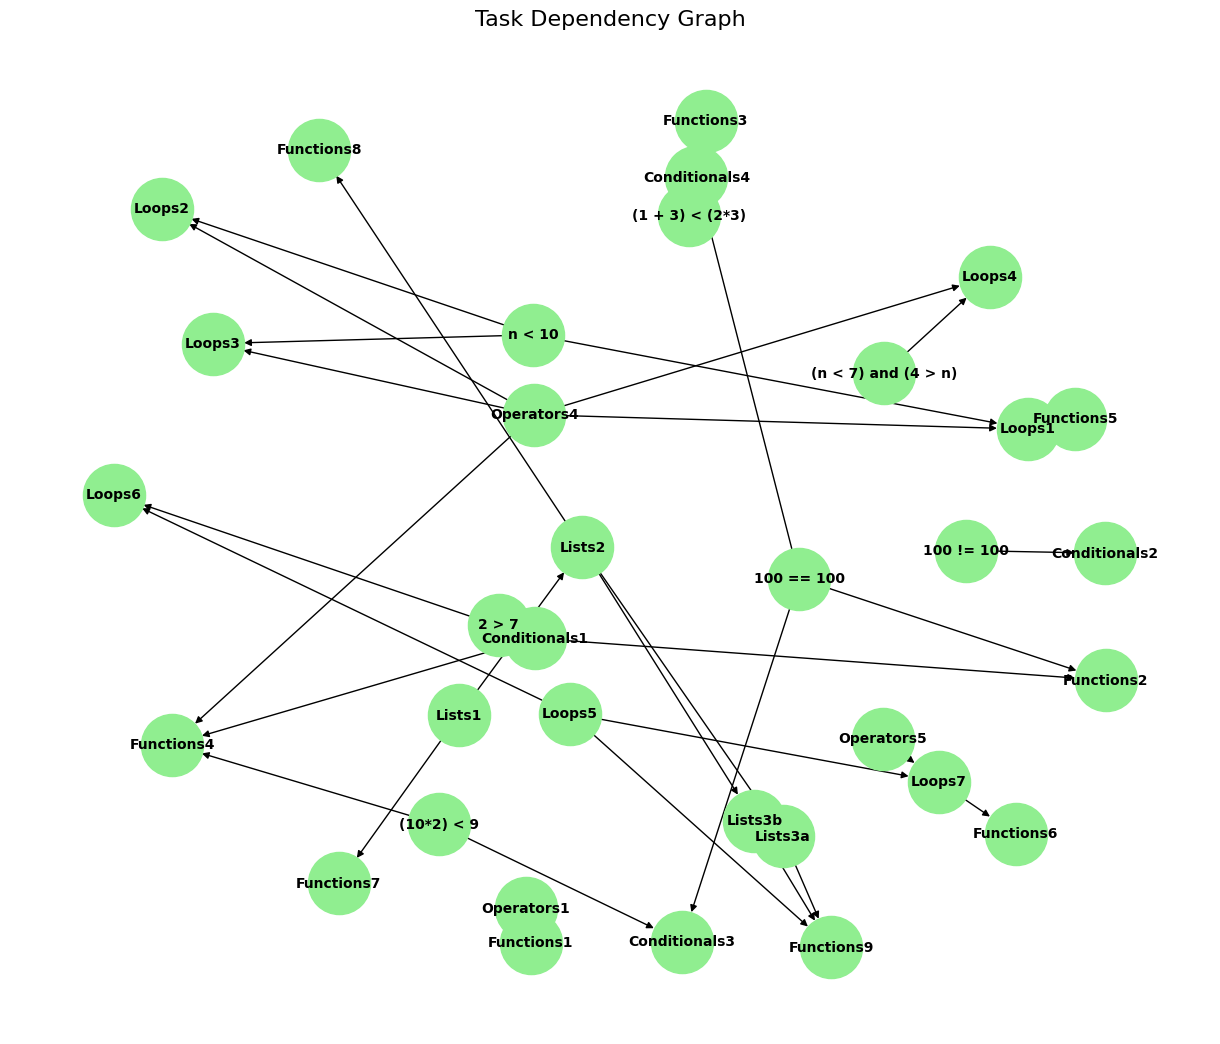

In [484]:
# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10, font_weight='bold', arrows=True)
plt.title('Task Dependency Graph', fontsize=16)
plt.show()

In [485]:
def print_dependences(task):
    try:
        dependes = dependencies(task)
    except:
        dependes = []
    print(f'The task {task} has the following dependencies: {dependes}')
    n_correct = len(df[(df[task+'_points'] != 0)])
    print(f'Total number of students that managed task "{task}": {n_correct} / {len(df)}')

    if len(dependes) > 0: 
        print(f'How many students managed the dependent tasks?')
        for depend_task in dependes:
            n_correct = len(df[(df[depend_task+'_points'] != 0)])
            print(f'Total number of students that managed task "{depend_task}": {n_correct} / {len(df)}')
            task_df = df[(df[depend_task+'_points'] != 0)]

        print()
        n_correct = len(task_df[(task_df[task+'_points'] != 0)])
        n_total = len(task_df)
        print(f'Of all the students that managed all dependent tasks {n_correct} out of {n_total} managed "{task}"')
        print(f'This indicates that {n_total - n_correct} struggle with the non dependent concept in "{task}"')

def print_simple_dependeces(task):
    try:
        dependes = dependencies(task)
        if len(dependes) == 0:
            print('No dependence')
            return
    except:
        print('No dependence')
        return
        
    print(f'#### {task} ###')
    total_correct = len(df[(df[task+'_points'] != 0)])
    total_correct_percentage = round((total_correct / len(df)) * 100, 1)
    task_df = df
    for depend_task in dependes:
        task_df = task_df[(task_df[depend_task+'_points'] != 0)]
    dependent_correct = len(task_df)
    dependent_correct_percentage = round((dependent_correct / len(df)) * 100, 1)
    print('{:40s} {:50s} {:5d} {:5s}'.format('Correctly answered', task, total_correct, '('+str(total_correct_percentage)+'%)'))
    print('{:40s} {:50s} {:5d} {:5s}'.format('Correctly answered dependent tasks', str(dependes), dependent_correct, '('+str(dependent_correct_percentage)+'%)'))
    task_df = task_df[(task_df[task+'_points'] == 0)]
    task_percentage = round((len(task_df) / dependent_correct) * 100, 1)
    print('{:40s} {:50s} {:5d} {:5s}'.format('Managed dependent tasks, but failed', task, len(task_df), '('+str(task_percentage)+'%)'))
    

def dependencies(task):
    dependency_list = []
    for dependency in tasks[task]:
        try:
            dependency_list =+ dependencies(dependency)
        except:
            dependency_list.append(dependency)
    return dependency_list

In [486]:
for task in tasks:
    print_simple_dependeces(task)
    print()
    print()

#### Conditionals1 ###
Correctly answered                       Conditionals1                                       1343 (68.1%)
Correctly answered dependent tasks       ['2 > 7']                                           1732 (87.9%)
Managed dependent tasks, but failed      Conditionals1                                        443 (25.6%)


#### Conditionals2 ###
Correctly answered                       Conditionals2                                        982 (49.8%)
Correctly answered dependent tasks       ['100 != 100']                                      1068 (54.2%)
Managed dependent tasks, but failed      Conditionals2                                        208 (19.5%)


#### Conditionals3 ###
Correctly answered                       Conditionals3                                       1109 (56.3%)
Correctly answered dependent tasks       ['100 == 100', '(10*2) < 9']                        1483 (75.2%)
Managed dependent tasks, but failed      Conditionals3                         